In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("train_data.csv")

In [3]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [5]:
df['Stay'].nunique()

11

In [6]:
df['Stay'].unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

<AxesSubplot:xlabel='Stay', ylabel='count'>

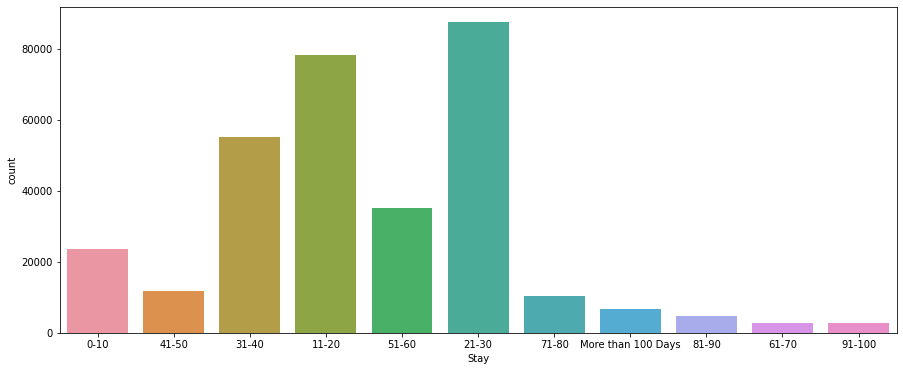

In [7]:
plt.figure(figsize=(15,6))
sns.countplot(x='Stay',data=df)

# DROPPING SOME UNNECCESSARY COLUMNS

In [8]:
df.drop(['case_id','Hospital_code'],axis=1,inplace=True)

# make a function and create another column as 'stay_category'(number it from 1 to 11)...make it int..then use df.corr()

In [9]:
def stay_cat_encoder(x):
    if x == '0-10':
        return 0
    elif x == '11-20':
        return 1
    elif x == '21-30':
        return 2
    elif x == '31-40':
        return 3
    elif x == '41-50':
        return 4
    elif x == '51-60':
        return 5
    elif x == '61-70':
        return 6
    elif x == '71-80':
        return 7
    elif x == '81-90':
        return 8
    elif x == '91-100':
        return 9
    elif x == 'More than 100 Days':
        return 10

In [10]:
df['Stay_cat'] = df['Stay'].apply(stay_cat_encoder)

In [11]:
df.corr()['Stay_cat'].sort_values()[:-1]

Available Extra Rooms in Hospital   -0.121120
Admission_Deposit                   -0.052077
City_Code_Patient                   -0.009704
patientid                            0.001125
City_Code_Hospital                   0.006381
Bed Grade                            0.025741
Visitors with Patient                0.537537
Name: Stay_cat, dtype: float64

In [12]:
df.head()

,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Stay_cat
0,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,0
1,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,4
2,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,3
3,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,4
4,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,4


# Let's get rid of unneccessary columns
# City_Code_Patient , City_Code_Hospital, patientid 

In [13]:
df.drop(['City_Code_Hospital','patientid','City_Code_Patient'],axis=1,inplace=True)

In [14]:
df.head()

,Hospital_type_code,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Stay_cat
0,c,Z,3,radiotherapy,R,F,2.0,Emergency,Extreme,2,51-60,4911.0,0-10,0
1,c,Z,2,radiotherapy,S,F,2.0,Trauma,Extreme,2,51-60,5954.0,41-50,4
2,e,X,2,anesthesia,S,E,2.0,Trauma,Extreme,2,51-60,4745.0,31-40,3
3,b,Y,2,radiotherapy,R,D,2.0,Trauma,Extreme,2,51-60,7272.0,41-50,4
4,b,Y,2,radiotherapy,S,D,2.0,Trauma,Extreme,2,51-60,5558.0,41-50,4


In [15]:
df['Hospital_type_code'].nunique()

7

In [16]:
df['Hospital_type_code'].unique()

array(['c', 'e', 'b', 'a', 'f', 'd', 'g'], dtype=object)

In [17]:
df['Hospital_region_code'].unique()

array(['Z', 'X', 'Y'], dtype=object)

In [18]:
df.isnull().sum()

Hospital_type_code                     0
Hospital_region_code                   0
Available Extra Rooms in Hospital      0
Department                             0
Ward_Type                              0
Ward_Facility_Code                     0
Bed Grade                            113
Type of Admission                      0
Severity of Illness                    0
Visitors with Patient                  0
Age                                    0
Admission_Deposit                      0
Stay                                   0
Stay_cat                               0
dtype: int64

# Bed Grade has some missing values...let's try filling those..since only less than 0.4% of data is missing we can fit missing values with the median/mean as it won't affect accuracy much

In [19]:
11300/(len(df)-113) # percentage of missing data in Bed Grade column

0.03549831147412236

In [20]:
df['Bed Grade'].median()

3.0

# we'll go with median

In [21]:
def imputer_Bed_Grade(x):
    if pd.isnull(x):
        return 3
    else:
        return x

In [22]:
df['Bed Grade'] = df['Bed Grade'].apply(imputer_Bed_Grade)

In [23]:
df.isnull().sum()

Hospital_type_code                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
Stay_cat                             0
dtype: int64

In [24]:
df['Bed Grade'].unique()

array([2., 3., 4., 1.])

# MISSING DATA HAS BEEN TAKEN CARE OF

In [25]:
df['Age'].nunique()

10

In [26]:
df['Age'].unique()

array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
       '11-20', '0-10', '91-100'], dtype=object)

In [27]:
def Age_cat_encoder(x):
    if x == '0-10':
        return 1
    elif x == '11-20':
        return 2
    elif x == '21-30':
        return 3
    elif x == '31-40':
        return 4
    elif x == '41-50':
        return 5
    elif x == '51-60':
        return 6
    elif x == '61-70':
        return 7
    elif x == '71-80':
        return 8
    elif x == '81-90':
        return 9
    elif x == '91-100':
        return 10

In [28]:
df['Age_cat'] = df['Age'].apply(Age_cat_encoder)

In [29]:
df.corr()['Stay_cat'].sort_values()[:-1]

Available Extra Rooms in Hospital   -0.121120
Admission_Deposit                   -0.052077
Bed Grade                            0.025761
Age_cat                              0.094163
Visitors with Patient                0.537537
Name: Stay_cat, dtype: float64

In [30]:
df.select_dtypes(include=['object']).columns

Index(['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age',
       'Stay'],
      dtype='object')

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()

In [33]:
df3 = df.copy()

In [34]:
df3.drop('Age',axis=1,inplace=True)

In [35]:
df3.select_dtypes(include=['object']).columns

Index(['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness',
       'Stay'],
      dtype='object')

# NOW LET'S DO LABEL ENCODING OF ALL THESE OBJECT COLUMNS

In [36]:
df3['Hospital_type_code'] = le.fit_transform(df3['Hospital_type_code'])
df3['Hospital_region_code'] = le.fit_transform(df3['Hospital_region_code'])
df3['Department'] = le.fit_transform(df3['Department'])
df3['Ward_Type'] = le.fit_transform(df3['Ward_Type'])
df3['Ward_Facility_Code'] = le.fit_transform(df3['Ward_Facility_Code'])
df3['Type of Admission'] = le.fit_transform(df3['Type of Admission'])
df3['Severity of Illness'] = le.fit_transform(df3['Severity of Illness'])

In [37]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_type_code                 318438 non-null  int32  
 1   Hospital_region_code               318438 non-null  int32  
 2   Available Extra Rooms in Hospital  318438 non-null  int64  
 3   Department                         318438 non-null  int32  
 4   Ward_Type                          318438 non-null  int32  
 5   Ward_Facility_Code                 318438 non-null  int32  
 6   Bed Grade                          318438 non-null  float64
 7   Type of Admission                  318438 non-null  int32  
 8   Severity of Illness                318438 non-null  int32  
 9   Visitors with Patient              318438 non-null  int64  
 10  Admission_Deposit                  318438 non-null  float64
 11  Stay                               3184

In [38]:
df3.corr()['Stay_cat'].sort_values()[:-1]

Available Extra Rooms in Hospital   -0.121120
Admission_Deposit                   -0.052077
Severity of Illness                 -0.031188
Ward_Facility_Code                  -0.004552
Hospital_region_code                 0.011905
Type of Admission                    0.023617
Bed Grade                            0.025761
Department                           0.033287
Hospital_type_code                   0.058592
Age_cat                              0.094163
Ward_Type                            0.185191
Visitors with Patient                0.537537
Name: Stay_cat, dtype: float64

In [39]:
X = df3.drop(['Stay_cat','Stay'],axis=1)
y = df3['Stay']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [42]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
X_train.shape

(213353, 12)

# 1) LOGISTIC REGRESSION

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lr = LogisticRegression(fit_intercept=True,n_jobs=-1)

In [46]:
lr.fit(X_train,y_train)

LogisticRegression(n_jobs=-1)

In [47]:
lr_pred = lr.predict(X_test)

In [48]:
from sklearn.metrics import classification_report,confusion_matrix

In [49]:
print(confusion_matrix(y_test,lr_pred))
print('\n')
print(classification_report(y_test,lr_pred))

[[  187  3535  3987   126     0    16     0     0     0     0     0]
 [   84 10013 13360  1213     0  1024     0     0     0     0     1]
 [   51  7944 19838   654     0   487     0     0     0     0    20]
 [   32  3591  7353  3483     0  3603     0     0     0     0    51]
 [   21   971  2225   300     0   297     0     0     1     0    31]
 [   19  1121  1700  3309     0  5393     0     0     0     0   119]
 [    4   172   432   115     0   162     0     0     0     0    24]
 [    5   296   337   959     0  1524     0     0     0     0   220]
 [    1    69    93   129     0  1204     0     0     0     0    98]
 [    2    58   105   262     0   347     0     0     0     0   127]
 [    9   111   134   204     0   983     0     0     0     0   739]]




C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

              0-10       0.45      0.02      0.05      7851
             11-20       0.36      0.39      0.37     25695
             21-30       0.40      0.68      0.51     28994
             31-40       0.32      0.19      0.24     18113
             41-50       0.00      0.00      0.00      3846
             51-60       0.36      0.46      0.40     11661
             61-70       0.00      0.00      0.00       909
             71-80       0.00      0.00      0.00      3341
             81-90       0.00      0.00      0.00      1594
            91-100       0.00      0.00      0.00       901
More than 100 Days       0.52      0.34      0.41      2180

          accuracy                           0.38    105085
         macro avg       0.22      0.19      0.18    105085
      weighted avg       0.34      0.38      0.33    105085



# LR = 38% ; can't use thise model as this model couldn't calculate F-1 score properly

# 2) RANDOM FOREST

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf = RandomForestClassifier(n_estimators=100)

In [52]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [53]:
rf_pred = rf.predict(X_test)

In [54]:
print(classification_report(y_test,rf_pred))
print('\n')
print(confusion_matrix(y_test,rf_pred))

                    precision    recall  f1-score   support

              0-10       0.24      0.19      0.21      7851
             11-20       0.36      0.41      0.38     25695
             21-30       0.40      0.47      0.43     28994
             31-40       0.30      0.26      0.28     18113
             41-50       0.07      0.03      0.05      3846
             51-60       0.37      0.42      0.40     11661
             61-70       0.03      0.01      0.02       909
             71-80       0.18      0.09      0.12      3341
             81-90       0.31      0.19      0.24      1594
            91-100       0.14      0.05      0.07       901
More than 100 Days       0.47      0.43      0.45      2180

          accuracy                           0.35    105085
         macro avg       0.26      0.23      0.24    105085
      weighted avg       0.33      0.35      0.34    105085



[[ 1465  3035  2527   533   113   117    24    19     5     5     8]
 [ 1752 10416  9134  2716 

# RF = 35% with n=100 (it is the same even when n=500)

# 3) KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier(n_neighbors=100,n_jobs=-1)

In [57]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=100)

In [58]:
knn_pred = knn.predict(X_test)
print(classification_report(y_test,knn_pred))
print('\n')
print(confusion_matrix(y_test,knn_pred))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

              0-10       0.41      0.05      0.09      7851
             11-20       0.36      0.51      0.42     25695
             21-30       0.39      0.63      0.48     28994
             31-40       0.36      0.19      0.24     18113
             41-50       0.00      0.00      0.00      3846
             51-60       0.38      0.36      0.37     11661
             61-70       0.00      0.00      0.00       909
             71-80       0.11      0.00      0.00      3341
             81-90       0.08      0.00      0.00      1594
            91-100       0.00      0.00      0.00       901
More than 100 Days       0.56      0.31      0.40      2180

          accuracy                           0.38    105085
         macro avg       0.24      0.19      0.18    105085
      weighted avg       0.35      0.38      0.34    105085



[[  404  4101  3239    75     0    32     0     0     0     0     0]
 [  224 13038 10820  1000 

# KNN ACCURACY = 38% with k=100

# 3) CATBOOST

In [59]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(random_state=42,use_best_model=True,iterations=1000)
cb.fit(X_train,y_train,use_best_model=True,verbose=100,eval_set=(X_test,y_test))

Learning rate set to 0.120201
0:	learn: 2.2008269	test: 2.2006327	best: 2.2006327 (0)	total: 474ms	remaining: 7m 53s
100:	learn: 1.5274508	test: 1.5412215	best: 1.5412215 (100)	total: 36.6s	remaining: 5m 26s
200:	learn: 1.5011670	test: 1.5271316	best: 1.5271316 (200)	total: 1m 13s	remaining: 4m 53s
300:	learn: 1.4861939	test: 1.5235873	best: 1.5235787 (299)	total: 1m 49s	remaining: 4m 13s
400:	learn: 1.4737425	test: 1.5223970	best: 1.5223970 (400)	total: 2m 23s	remaining: 3m 34s
500:	learn: 1.4621904	test: 1.5216077	best: 1.5216077 (500)	total: 2m 58s	remaining: 2m 57s
600:	learn: 1.4515444	test: 1.5216772	best: 1.5214074 (544)	total: 3m 33s	remaining: 2m 21s
700:	learn: 1.4412373	test: 1.5220170	best: 1.5214074 (544)	total: 4m 8s	remaining: 1m 46s
800:	learn: 1.4318662	test: 1.5226756	best: 1.5214074 (544)	total: 4m 44s	remaining: 1m 10s
900:	learn: 1.4226320	test: 1.5235204	best: 1.5214074 (544)	total: 5m 19s	remaining: 35.1s
999:	learn: 1.4140088	test: 1.5244724	best: 1.5214074 (544

In [60]:
cb_pred = cb.predict(X_test)
print(classification_report(y_test,cb_pred))
print('\n')
print(confusion_matrix(y_test,cb_pred))

                    precision    recall  f1-score   support

              0-10       0.38      0.15      0.22      7851
             11-20       0.41      0.51      0.45     25695
             21-30       0.43      0.63      0.51     28994
             31-40       0.40      0.23      0.29     18113
             41-50       0.17      0.00      0.01      3846
             51-60       0.41      0.47      0.44     11661
             61-70       0.00      0.00      0.00       909
             71-80       0.36      0.02      0.04      3341
             81-90       0.33      0.18      0.23      1594
            91-100       0.33      0.01      0.02       901
More than 100 Days       0.51      0.41      0.45      2180

          accuracy                           0.41    105085
         macro avg       0.34      0.24      0.24    105085
      weighted avg       0.40      0.41      0.38    105085



[[ 1204  3821  2758    38     6    19     0     1     0     0     4]
 [  697 13196  9857  1194 

# CatBoost = 41% ACCURACY
# So far, CatBoost seems to be the best model

# TRYING THE APPROACH OF RESAMPLING OF DATASET (NORMALLY USED IN HIGHLY IMBALANCED DATASET)

In [61]:
df4 = df3.copy()

In [62]:
len(df4[df4['Stay_cat']==0])

23604

<AxesSubplot:xlabel='Stay', ylabel='count'>

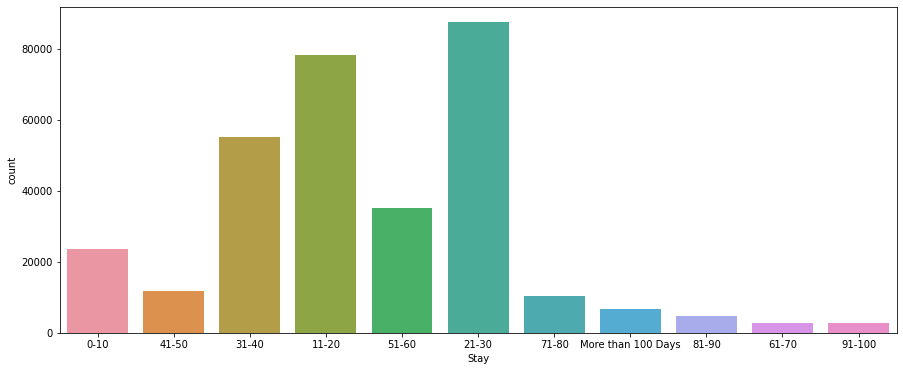

In [64]:
plt.figure(figsize=(15,6))
sns.countplot(x='Stay',data=df4)

In [67]:
for i in df4['Stay'].unique():
    print(f'count of category {i} is : ')
    print(len(df4[df4['Stay']==i]))
    

count of category 0-10 is : 
23604
count of category 41-50 is : 
11743
count of category 31-40 is : 
55159
count of category 11-20 is : 
78139
count of category 51-60 is : 
35018
count of category 21-30 is : 
87491
count of category 71-80 is : 
10254
count of category More than 100 Days is : 
6683
count of category 81-90 is : 
4838
count of category 61-70 is : 
2744
count of category 91-100 is : 
2765


# we'll make a dataset which conatins only 2700 values from each category

In [69]:
d_0 = df4[df4['Stay_cat']==0][:2700]

In [70]:
d_1 = df4[df4['Stay_cat']==1][:2700]

In [71]:
d_2 = df4[df4['Stay_cat']==2][:2700]
d_3 = df4[df4['Stay_cat']==3][:2700]
d_4 = df4[df4['Stay_cat']==4][:2700]
d_5 = df4[df4['Stay_cat']==5][:2700]
d_6 = df4[df4['Stay_cat']==6][:2700]
d_7 = df4[df4['Stay_cat']==7][:2700]
d_8 = df4[df4['Stay_cat']==8][:2700]
d_9 = df4[df4['Stay_cat']==9][:2700]
d_10 = df4[df4['Stay_cat']==10][:2700]

In [72]:
df_new = pd.concat([d_0,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10],axis=0)

In [73]:
df_new.head()

,Hospital_type_code,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Admission_Deposit,Stay,Stay_cat,Age_cat
0,2,2,3,3,2,5,2.0,0,0,2,4911.0,0-10,0,6
6,5,1,1,3,3,1,3.0,0,0,2,6167.0,0-10,0,6
12,2,2,2,3,2,0,3.0,0,0,2,5141.0,0-10,0,6
14,0,0,4,2,1,5,3.0,0,0,2,2685.0,0-10,0,8
15,0,0,3,2,1,5,3.0,0,0,2,9398.0,0-10,0,8


In [74]:
df_new.corr()['Stay_cat'].sort_values()[:-1]

Available Extra Rooms in Hospital   -0.138529
Admission_Deposit                   -0.080558
Severity of Illness                 -0.040679
Hospital_region_code                 0.002927
Ward_Facility_Code                   0.008718
Type of Admission                    0.021642
Hospital_type_code                   0.039164
Department                           0.042179
Age_cat                              0.066009
Bed Grade                            0.069513
Ward_Type                            0.216041
Visitors with Patient                0.551930
Name: Stay_cat, dtype: float64

In [100]:
X = df_new.drop(['Stay_cat','Stay'],axis=1)
y = df_new['Stay']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [103]:
len(X)

29700

In [104]:
X_train.shape

(23760, 12)

In [98]:
cb = CatBoostClassifier(random_state=42,use_best_model=True,iterations=1000)
cb.fit(X_train,y_train,use_best_model=True,verbose=100,eval_set=(X_test,y_test))

Learning rate set to 0.276251
0:	learn: 2.2336305	test: 2.2558758	best: 2.2558758 (0)	total: 177ms	remaining: 17.5s
99:	learn: 1.0015158	test: 1.9383770	best: 1.8820329 (35)	total: 16.9s	remaining: 0us

bestTest = 1.882032883
bestIteration = 35

Shrink model to first 36 iterations.


In [99]:
cb_pred = cb.predict(X_test)
print(classification_report(y_test,cb_pred))
print('\n')
print(confusion_matrix(y_test,cb_pred))

                    precision    recall  f1-score   support

              0-10       0.34      0.55      0.42       868
             11-20       0.29      0.33      0.31       893
             21-30       0.25      0.31      0.28       890
             31-40       0.17      0.10      0.13       888
             41-50       0.26      0.21      0.23       933
             51-60       0.26      0.25      0.26       885
             61-70       0.22      0.16      0.18       890
             71-80       0.22      0.24      0.23       875
             81-90       0.48      0.64      0.54       862
            91-100       0.30      0.21      0.25       940
More than 100 Days       0.51      0.44      0.47       877

          accuracy                           0.31      9801
         macro avg       0.30      0.31      0.30      9801
      weighted avg       0.30      0.31      0.30      9801



[[475 131  89  26  72   5  57   8   1   4   0]
 [212 298 175  46  71  16  46  17   5   7   0]
 

# CatBoost accuracy on resampled dataset = 32%
# CatBoost seems to perform not as good as it performed on the original dataset

In [105]:
X2 = df4.drop(['Stay_cat','Stay'],axis=1)
y2 = df4['Stay']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)

In [107]:
cb_pred2 = cb.predict(X2_test)
print(classification_report(y2_test,cb_pred2))
print('\n')
print(confusion_matrix(y2_test,cb_pred2))

                    precision    recall  f1-score   support

              0-10       0.20      0.40      0.27      4689
             11-20       0.41      0.21      0.28     15561
             21-30       0.48      0.20      0.28     17603
             31-40       0.15      0.05      0.08     10981
             41-50       0.07      0.15      0.10      2357
             51-60       0.15      0.11      0.13      7128
             61-70       0.03      0.21      0.05       554
             71-80       0.05      0.11      0.07      2031
             81-90       0.03      0.24      0.05       941
            91-100       0.03      0.22      0.05       552
More than 100 Days       0.20      0.64      0.30      1291

          accuracy                           0.19     63688
         macro avg       0.16      0.23      0.15     63688
      weighted avg       0.30      0.19      0.21     63688



[[1875  545  347  339  269  302  449  272   31  247   13]
 [3153 3268 1814 1241 1030 1351  931 

# So, when the resampled CatBoost model is applied to the original dataset, the model's performance is very poor.

# Hence, the best approach is to use CatBoost classifier on the original dataset, which will give around 41% accuracy

In [108]:
X = df3.drop(['Stay_cat','Stay'],axis=1)
y = df3['Stay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [114]:
cb = CatBoostClassifier(random_state=42,use_best_model=True,iterations=600)
cb.fit(X_train,y_train,use_best_model=True,verbose=100,eval_set=(X_test,y_test))

Learning rate set to 0.146102
0:	learn: 2.1622485	test: 2.1620118	best: 2.1620118 (0)	total: 349ms	remaining: 3m 29s
100:	learn: 1.5195864	test: 1.5366842	best: 1.5366842 (100)	total: 33.6s	remaining: 2m 46s
200:	learn: 1.4946382	test: 1.5257209	best: 1.5257209 (200)	total: 1m 8s	remaining: 2m 15s
300:	learn: 1.4783891	test: 1.5230839	best: 1.5230839 (300)	total: 1m 42s	remaining: 1m 42s
400:	learn: 1.4631218	test: 1.5222015	best: 1.5221693 (395)	total: 2m 17s	remaining: 1m 8s
500:	learn: 1.4498471	test: 1.5220843	best: 1.5218036 (461)	total: 2m 53s	remaining: 34.2s
599:	learn: 1.4379362	test: 1.5227074	best: 1.5218036 (461)	total: 3m 27s	remaining: 0us

bestTest = 1.521803571
bestIteration = 461

Shrink model to first 462 iterations.


In [116]:
cb_pred = cb.predict(X_test)
print(classification_report(y_test,cb_pred))
print('\n')
print(confusion_matrix(y_test,cb_pred))

                    precision    recall  f1-score   support

              0-10       0.38      0.15      0.22      7851
             11-20       0.41      0.51      0.45     25695
             21-30       0.43      0.63      0.51     28994
             31-40       0.40      0.23      0.30     18113
             41-50       0.18      0.00      0.00      3846
             51-60       0.41      0.47      0.44     11661
             61-70       0.00      0.00      0.00       909
             71-80       0.35      0.02      0.04      3341
             81-90       0.33      0.19      0.24      1594
            91-100       0.39      0.01      0.02       901
More than 100 Days       0.52      0.41      0.45      2180

          accuracy                           0.41    105085
         macro avg       0.34      0.24      0.24    105085
      weighted avg       0.40      0.41      0.38    105085



[[ 1201  3814  2758    44     5    25     0     1     0     0     3]
 [  712 13227  9821  1182 